<a href="https://colab.research.google.com/github/Suriya6744/Project_Data/blob/main/ARIMA_GARCH_PTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# #ราคาทองคำ
# xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD-Historical-Data.csv')

# #ราคาน้ำมันดิบ
# wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD-Historical-Data.csv')

# #อัตราแลกเปลี่ยน
# ex = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB-Historical-Data.csv')

# #หุ้น PTT
# ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT-Historical-Data.csv')

# #หุ้น SCG
# scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG-Historical-Data.csv')

# #หุ้น SOLAR
# solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR-Historical-Data.csv')

In [ ]:
# xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})

# wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})

# ex =ex.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ex'})

# ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt','ปริมาณ': 'vol_ptt'})

# scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg','ปริมาณ': 'vol_scg'})

# solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar','ปริมาณ': 'vol_solar'})

##หุ้น PTT

In [ ]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT Historical Data.csv')
ptt.shape

In [ ]:
ptt.head()

In [ ]:
ptt.isnull().any()

In [ ]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)

# #แทนที่ M ด้วยช่องว่าง
# ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

# # สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
# def multiply_by_million(value):
#     return value * 1000000

# # ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
# ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt



In [ ]:
ptt['vol_ptt']=ptt['vol_ptt'].astype(str)

# #แทนที่ M ด้วยช่องว่าง
ptt['vol_ptt'] = ptt['vol_ptt'].str.replace('M', '', regex=True)
ptt['vol_ptt']=ptt['vol_ptt'].astype(float)

# # สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
     return value * 1000000

# # ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['vol_ptt']=ptt['vol_ptt'].apply(multiply_by_million)
ptt['vol_ptt']=ptt['vol_ptt'].astype(int)
ptt

##หุ้น SCG

In [ ]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG Historical Data.csv')
scg.shape


In [ ]:
scg.head()

In [ ]:
scg.isnull().any()

In [ ]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
# scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
# scg['ปริมาณ']=scg['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

In [ ]:
scg['vol_scg'] = scg['vol_scg'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
scg['vol_scg']=scg['vol_scg'].astype(int)
scg

##หุ้น SOLAR

In [ ]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR Historical Data.csv')
solar.shape


In [ ]:
solar.head()

In [ ]:
solar.isnull().any()

In [ ]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
# solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
# solar['ปริมาณ']=solar['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

In [ ]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['vol_solar'] = solar['vol_solar'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
solar['vol_solar']=solar['vol_solar'].astype(int)
solar

## ราคาน้ำมันดิบ (WTI)

In [ ]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD Historical Data.csv')
wti.shape

In [ ]:
wti.head()

In [ ]:
wti.isnull().any()

In [ ]:
wti.dtypes

In [ ]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
wti=wti[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

##ราคาทองคำ (XAU)

In [ ]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD Historical Data.csv')
xau.shape

In [ ]:
xau.head()

In [ ]:
xau.isnull().any()

In [ ]:
xau.dtypes

In [ ]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
xau=xau[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau['cp_xau'] = xau['cp_xau'].str.replace(',', '').astype(float)
xau

##อัตราแลกเปลี่ยน (EX)

In [ ]:
ex = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB Historical Data.csv')
ex.shape

In [ ]:
ex.head()

In [ ]:
ex.isnull().any()

In [ ]:
ex.dtypes

In [ ]:
ex =ex .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ex'})
ex = ex[['date' ,'cp_ex']]
ex

##Merge Table

In [ ]:
tm1 = wti.merge(ex, how ='left', left_on=['date',], right_on=['date',])
tm2 = tm1.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm3 = tm2.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm4 = tm3.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm5 = tm4.merge(solar, how ='left', left_on=['date',], right_on=['date',])
all_data = tm5

In [ ]:
all_data.isnull().any()

In [ ]:
all_data['date'] = all_data['date'].str.replace('/', '-')
all_data

In [ ]:
#all_data.to_csv('Project.csv', index=False)

##แทนค่าสูญหาย

In [ ]:
all_data.isnull().any()

In [ ]:
all_data.columns

In [ ]:
# ใช้ fillna() เพื่อแทนค่าว่างด้วยค่าก่อนหน้า
all_data.fillna(method='ffill', inplace=True)
all_data

In [ ]:
all_data.isnull().any()

In [ ]:
# คูณคอลัมน์ 'cp_wti' ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_ex']
# คูณคอลัมน์ 'cp_xau ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_xau'] = all_data['cp_xau'] * all_data['cp_ex']
all_data

In [ ]:
all_data = round(all_data, 2) #ทศนิยม 2 ตำแหน่ง
all_data

In [ ]:
# save data
#all_data.to_csv('Project_data.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# กำหนดสีและ alpha สำหรับแต่ละคอลัมน์
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# สร้าง histogram สำหรับทุกคอลัมน์ที่เป็นตัวเลข
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(all_data.columns[1:]):
    ax = axes[i // 3, i % 3]
    n, bins, patches = ax.hist(all_data[col], bins=10, color=color[i], alpha=0.7, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.grid(axis='y', alpha=0.75)
    ax.set_axisbelow(True)

    # เพิ่มเส้นแนะนำ (แบบเส้นกำกับ) สำหรับค่าเฉลี่ย
    mean_value = all_data[col].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.legend()

plt.show()

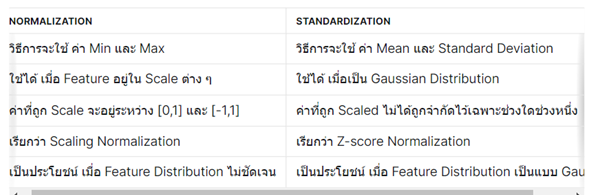

## Normalization

In [ ]:
all_data_X = all_data[['cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]
all_data_X

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# สร้าง object MinMaxScaler
scaler = MinMaxScaler()

# Fit และ Transform ข้อมูล
normalized_data = scaler.fit_transform(all_data_X)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
normalized_df = pd.DataFrame(normalized_data, columns=all_data_X.columns)

# สร้าง DataFrame ของคอลัมน์ 'date'
date = all_data[['date']]

# รวม DataFrame ของ 'date' และ DataFrame ของข้อมูลที่แทนค่าสูญหาย
cm_df = pd.concat([date, normalized_df], axis=1)
cm_df


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # Fit และ Transform ข้อมูล
# scaled_data = scaler.fit_transform(all_data_X)

# # สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
# scaled_df = pd.DataFrame(scaled_data, columns=all_data_X.columns)

# # แสดงผลลัพธ์
#scaled_df

In [ ]:
#หาความสัมพันธ์
correlation_matrix = normalized_df.corr()
correlation_matrix

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
for column in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

##กราฟแสดงแนวโน้มของราคาหุ้น

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(all_data['cp_ptt'])), all_data['cp_ptt'])
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Closing Price', fontsize=10)
plt.title('Stock Prices PTT')
plt.show()

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(all_data['cp_solar'])), all_data['cp_solar'])
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Closing Price', fontsize=10)
plt.title('Stock Prices SOLAR')
plt.show()

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(all_data['cp_scg'])), all_data['cp_scg'])
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Closing Price', fontsize=10)
plt.title('Stock Prices SCG')
plt.show()

#ARIMA-GARCH (PTT)

##ARIMA

In [ ]:
a = cm_df[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']]

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # พล็อตกราฟ cp_ptt
# plt.figure(figsize=(10, 6))  # กำหนดขนาดของกราฟ
# plt.plot(a, marker='o', linestyle='-')
# plt.title('closing price ptt')
# plt.xlabel('Time')
# plt.ylabel('closing price')
# plt.show()


###ACF_ptt

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import pandas as pd

# สร้าง subplot 2x1
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# วาดกราฟของ 'cp_ptt' ใน subplot แรก
axes[0].plot(a.index, a['cp_ptt'], label='cp_ptt')
axes[0].set_title('Close Price for PTT')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price')

# พล็อตกราฟ ACF ใน subplot ที่สอง
sm.graphics.tsa.plot_acf(a['cp_ptt'], lags=60, ax=axes[1])  # เปลี่ยนคอลัมน์ให้ตรงกับข้อมูลจริง
axes[1].set_title('Autocorrelation Function (ACF) for PTT')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('ACF')

# แสดงกราฟเทียบระหว่างกราฟข้อมูลจริงกับกราฟ ACF
plt.tight_layout()
plt.show()



###ทดสอบ ADF

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# ทำ ADF Test
adf_result = adfuller(a['cp_ptt'])

# แสดงผลลัพธ์
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
#ค่า ADF Statistic มากกว่า Critical Values = ไม่นิ่ง

###Different 1

#####ACF_ptt_diff

In [ ]:
# ลบค่าก่อนหน้าเพื่อทำให้ข้อมูล stationary
#ใชการแปลงอนุกรมเวลาให้มีค่าเฉลี่ยคงที่โดยหาผลต่างครั้งที่ d=1
a['cp_ptt_diff'] = a['cp_ptt'].diff()
a.dropna(inplace=True)  # ลบแถวที่มีค่าที่ขาดหาย

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import pandas as pd

# สร้าง subplot 2x1
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# วาดกราฟของ 'cp_ptt' ใน subplot แรก
axes[0].plot(a.index,a['cp_ptt_diff'], label='cp_ptt_diff')
axes[0].set_title('Close Price for Diff PTT')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price')

# พล็อตกราฟ ACF ใน subplot ที่สอง
sm.graphics.tsa.plot_acf(a['cp_ptt_diff'], lags=60, ax=axes[1])  # เปลี่ยนคอลัมน์ให้ตรงกับข้อมูลจริง
axes[1].set_title('Autocorrelation Function (ACF) for Diff PTT')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('ACF')

# แสดงกราฟเทียบระหว่างกราฟข้อมูลจริงกับกราฟ ACF
plt.tight_layout()
plt.show()


####ทดสอบ ADF_diff

In [ ]:
# ทำ ADF Test อีกครั้ง
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(a['cp_ptt_diff'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
#เนื่องจากค่า ADF Statistic น้อยกว่า Critical Values แสดงว่าข้อมูลนิ่งแล้ว

###กำหนดตัวแบบ

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import pandas as pd

# สร้าง subplot 2x1
fig, axes = plt.subplots(2, 1, figsize=(8, 4))

# พล็อตกราฟ ACF ใน subplot แรก
sm.graphics.tsa.plot_acf(a['cp_ptt_diff'], lags=60, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) for Residual PTT')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# พล็อตกราฟ PACF ใน subplot ที่สอง
sm.graphics.tsa.plot_pacf(a['cp_ptt_diff'], lags=60, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) for Residual PTT')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

# แสดงกราฟเทียบระหว่าง ACF และ PACF
plt.tight_layout()
plt.show()


###หา parameter ที่ดีที่สุด

In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm

data = a['cp_ptt']

# สร้างเซตของค่า p, d, และ q
p_values =  [0,1] # เลือกค่า p 1
d_values = [1]  # ค่า d ต้องเป็น 1 สำหรับ ARIMA
q_values = range(0, 2)  # เลือกค่า q จาก 0 ถึง 1

# สร้างรายการค่า AIC, BIC และพารามิเตอร์ที่เกี่ยวข้อง
aic_values = []
bic_values = []
params = []

# วนลูปผสานค่า p, d, และ q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # สร้างแบบจำลอง ARIMA
        model = sm.tsa.ARIMA(data, order=(p, d, q))

        # ปรับโมเดล
        results = model.fit()

        # นับค่า AIC, BIC และเก็บค่า AIC, BIC และพารามิเตอร์
        aic = results.aic
        bic = results.bic
        aic_values.append(aic)
        bic_values.append(bic)
        params.append((p, d, q))

        print(f'ARIMA({p},{d},{q}) - AIC: {aic}, BIC: {bic}')

    except Exception as e:
        continue

# หาค่า AIC และ BIC ที่ดีที่สุดและพารามิเตอร์ที่เกี่ยวข้อง
best_aic = min(aic_values)
best_bic = min(bic_values)
best_params = params[aic_values.index(best_aic)]

print(f'Best AIC: {best_aic}')
print(f'Best BIC: {best_bic}')
print(f'Best Model (p, d, q): {best_params}')


###ดูค่าคงที่

In [ ]:
import statsmodels.api as sm

# สร้างแบบจำลอง ARIMA(0,1,1)
model = sm.tsa.ARIMA(a['cp_ptt'], order=(0, 1, 0))

# ปรับโมเดล
results = model.fit()

# ดูสรุปของโมเดล
print(results.summary())

In [ ]:
a['forecast'] = results.predict(start=0,end=-1,dynamic=False)
a[['cp_ptt', 'forecast']].plot(figsize=(12, 8), color=['blue', 'red'])

In [ ]:
#a.to_csv('Project.csv', index=False)

In [ ]:
# import numpy as np

# # คำนวณค่า RMSE
# rmse = np.sqrt(((a['cp_ptt'] - a['forecast']) ** 2).mean())

# # คำนวณค่า MAPE
# mape = np.mean(np.abs((a['cp_ptt'] - a['forecast']) / a['cp_ptt'])) * 100

# print("Root Mean Squared Error (RMSE):", rmse)
# print("Mean Absolute Percentage Error (MAPE):", mape)


###residual

In [ ]:
residuals = results.resid
residuals

In [ ]:
import numpy as np

sq_residuals = np.square(residuals)

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.plot(sq_residuals, label='Square  Residual')
plt.title('Square  Residual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
import pandas as pd

# สร้าง subplot
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# พล็อต ACF
plot_acf(sq_residuals, lags=40, ax=axes)
plt.title('Autocorrelation Function (ACF) for PTT')
plt.xlabel('Lag')
plt.ylabel('ACF')

# แสดงกราฟ
plt.grid(True)
plt.show()

In [ ]:
# !pip install pmdarima
# !pip install arch

# import numpy as np
# import pandas as pd
# from arch import arch_model
# from scipy.stats import chi2


# # ประมาณค่า ARCH model
# model = arch_model(residuals, vol='ARCH', p=6)
# results = model.fit()

# # คำนวณค่าความแปรปรวนรายวัน
# daily_volatility = np.sqrt(results.conditional_volatility**2)

# # คำนวณค่าความแปรปรวนที่คำนวนจากโมเดล
# model_volatility = results.conditional_volatility

# # ทดสอบ chi-square
# chi_square_statistic = np.sum(((daily_volatility - model_volatility)**2) / model_volatility)
# degrees_of_freedom = len(residuals) - 1  # องค์กระดับความเสี่ยง - 1
# chi_square_critical_value = chi2.ppf(0.95, degrees_of_freedom)  # ใช้ระดับนัยสำคัญ 0.05

# # คำนวณ p-value
# p_value = 1 - chi2.cdf(chi_square_statistic, degrees_of_freedom)

# print("Chi-Square Statistic:", chi_square_statistic)
# print("Degrees of Freedom:", degrees_of_freedom)
# print("Chi-Square Critical Value:", chi_square_critical_value)
# print("p-value:", p_value)

# # ทดสอบว่ามี ARCH effect หรือไม่
# if chi_square_statistic > chi_square_critical_value:
#     print("Reject null hypothesis: There is evidence of ARCH effect.")
# else:
#     print("Fail to reject null hypothesis: There is no evidence of ARCH effect.")


## ARIMA-GARCH

In [ ]:
#!pip install pmdarima
!pip install arch

# แบ่งข้อมูลเป็นชุดฝึกสอน (80%) และชุดทดสอบ (20%)
train_size = int(0.8 * len(a))
train_data = a.iloc[:train_size]
test_data = a.iloc[train_size:]
import numpy as np
import pandas as pd
from arch import arch_model
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# 1. ประมาณค่า ARIMA model
arima_model = ARIMA(a['cp_ptt'], order=(1, 1, 1))
arima_results = arima_model.fit()
arima_residuals = arima_results.resid

exog_data = train_data[['cp_ex', 'cp_xau', 'vol_ptt','cp_wti']]
# สร้าง GARCH model โดยให้ 'cp_wti' เป็นตัวแปรตามและ 'cp_ex', 'cp_xau', 'vol_ptt' เป็นตัวแปรอิสระ
garch_model = arch_model(arima_residuals, vol='Garch', p=1, q=1, x=exog_data,mean='zero')
garch_results = garch_model.fit()


conditional_volatility = garch_results.conditional_volatility
fitted_values = arima_results.fittedvalues + conditional_volatility
print(garch_results.summary())
print(arima_results.summary())

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. fitted values
plt.figure(figsize=(12, 6))
plt.plot(a['cp_ptt'], label='Actual', color='blue')
plt.plot(fitted_values[-len(test_data):], label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('cp_ptt')
plt.title('Actual vs. Forecasted Prices (ARIMA-GARCH)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming fitted_values contains the entire time series including train and test data
# Create a DataFrame containing only the test data and the corresponding fitted values
result_data = pd.DataFrame({'Actual': test_data_ag['cp_ptt'], 'Forecasted': fitted_values[-len(test_data_ag):]})

# Print the result_data DataFrame
result_data

In [ ]:
# # Create a DataFrame for comparison
# ari_ga = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()})
# lstm_solar_pd['Predicted'] = lstm_solar_pd['Predicted'].apply(lambda x: x[0])

# # Print the comparison table
# lstm_solar_pd

In [ ]:
max_original = all_data_X['cp_ptt'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_ptt'].min()  # Min Value ของข้อมูลเดิม

result_data['Actual'] = (result_data['Actual'] * (max_original - min_original)) +min_original
result_data['Predicted'] = (result_data['Forecasted'] * (max_original - min_original)) + min_original
result_data

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(result_data['Actual'], result_data['Predicted'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(result_data['Actual'])
mape = (1/n) * np.sum(np.abs((result_data['Actual'] - result_data['Predicted']) /result_data['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.2}%")

#ลอง

In [ ]:
# #!pip install pmdarima
# #!pip install arch

# # แบ่งข้อมูลเป็นชุดฝึกสอน (80%) และชุดทดสอบ (20%)
# train_size = int(0.8 * len(a))
# train_data = a.iloc[:train_size]
# test_data = a.iloc[train_size:]
# import numpy as np
# import pandas as pd
# from arch import arch_model
# import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA

# # 1. ประมาณค่า ARIMA model
# arima_model = ARIMA(a['cp_ptt'], order=(1, 1, 1))
# arima_results = arima_model.fit()
# arima_residuals = arima_results.resid

# exog_data = train_data[['cp_ex', 'cp_xau', 'vol_ptt','cp_wti']]
# # สร้าง GARCH model โดยให้ 'cp_wti' เป็นตัวแปรตามและ 'cp_ex', 'cp_xau', 'vol_ptt' เป็นตัวแปรอิสระ
# garch_model = arch_model(arima_residuals, vol='Garch', p=1, q=1, x=exog_data,mean='zero')
# garch_results = garch_model.fit()

# # 3. สร้างโมเดลผสม ARIMA-GARCH
# mean_model = sm.OLS(arima_residuals, garch_results.conditional_volatility)
# mean_results = mean_model.fit()

# # 4. ประมาณค่าตัวแบบผสม ARIMA-GARCH
# arima_garch_model = sm.tsa.ARIMA(a['cp_ptt'], order=(1, 1, 1))
# arima_garch_model.volatility = garch_results.conditional_volatility
# arima_garch_model._results = mean_results

# # 5. ประมาณค่าค่าพยากรณ์
# arima_garch_results = arima_garch_model.fit()
# print(arima_results.summary())
# print(garch_results.summary())


In [ ]:
# !pip install arch
# import arch
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # แบ่งข้อมูลเป็นชุดการฝึกอบรมและชุดทดสอบ
# train_size = int(len(a) * 0.8)
# train_data = a.iloc[:train_size]
# test_data = a.iloc[train_size:]

# # 1. ประมาณค่า ARIMA model
# arima_model = ARIMA(all_data_X['cp_ptt'], order=(0, 1, 1))
# arima_results = arima_model.fit()

# #x=train_data[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']]
# # 2. ประมาณค่า GARCH model บนค่าความเหลื่อมที่ได้จาก ARIMA
# arima_residuals = arima_results.resid
# #,
# # สร้างและฟิตโมเดล GARCH(2,3) ด้วยข้อมูลการฝึกอบรม
# model_garch = arch.arch_model(arima_residuals ,x=train_data[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']],
#                              vol='Garch', p=6, q=6,mean='zero')
# results_garch = model_garch.fit()

# # ใช้โมเดล GARCH ที่ฟิตแล้วเพื่อทำนายค่าความผิดพลาดสำหรับชุดทดสอบ
# predictions = results_garch.forecast(start=0, horizon=len(test_data))
# forecasted_residuals = predictions.mean.values

# # ปรับข้อมูลความผิดพลาดให้มีความยาวเท่ากับ test_data
# forecasted_residuals = np.resize(forecasted_residuals, len(test_data))

# # คำนวณค่า 'cp_ptt_diff' สำหรับชุดทดสอบ
# test_data['forecasted_cp_ptt'] = test_data['cp_ptt'].iloc[-len(test_data):] + np.cumsum(forecasted_residuals)
# import matplotlib.pyplot as plt

# # พล็อตกราฟข้อมูลการฝึก
# plt.figure(figsize=(12, 6))
# plt.plot(train_data.index, train_data['cp_ptt'], label='Train cp_ptt', color='green')

# # พล็อตกราฟข้อมูลการทดสอบ
# plt.plot(test_data.index, test_data['cp_ptt'], label='Actual cp_ptt', color='blue')
# plt.plot(test_data.index, test_data['forecasted_cp_ptt'], label='Forecasted cp_ptt', color='red')

# plt.xlabel('Date')
# plt.ylabel('cp_ptt')
# plt.legend()
# plt.title('Train, Actual, and Forecasted cp_ptt')
# plt.grid(True)
# plt.show()
